In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures #Para funciones polinomiales
from scipy.optimize import curve_fit

df = pd.read_excel("Basededatos_SituacionProblemaE1.xlsx")
df

,Precio de Venta (pesos),Antigüedad (en años),Kilometraje (miles),Condición (Promedio),Excelente,Único Dueño
0,60000,9,112,1,0,1
1,54000,9,159,0,0,1
2,59900,8,192,0,0,1
3,110000,7,90,1,0,0
4,79760,7,80,0,0,1
5,78000,7,133,0,0,1
6,56000,7,170,0,0,1
7,136000,6,112,0,1,0
8,125900,6,106,1,0,0
9,74000,6,96,0,0,1


r^2 = 76.11488076046545%


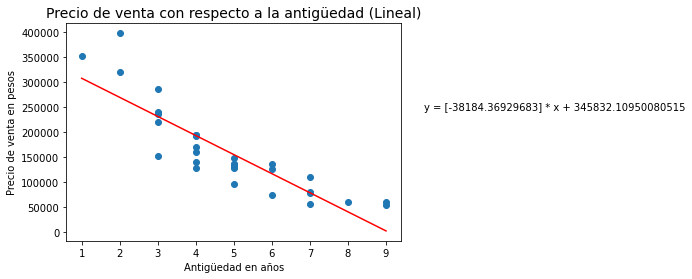

In [3]:
X1 = df[["Antigüedad (en años)"]]
y1 = df["Precio de Venta (pesos)"]

modelo1 = linear_model.LinearRegression().fit(X1,y1)

pred1 = modelo1.predict(X1)

plt.scatter(df["Antigüedad (en años)"],df["Precio de Venta (pesos)"])
plt.plot(X1,pred1,color = 'red')
plt.title("Precio de venta con respecto a la antigüedad (Lineal)",fontsize = 14)
plt.xlabel("Antigüedad en años")
plt.ylabel("Precio de venta en pesos")

plt.text(10, 250000, 'y = ' + str(modelo1.coef_) + ' * x + ' + str(modelo1.intercept_) ,verticalalignment='center')

r2_score_1 = modelo1.score(X1,y1)
print(f"r^2 = {r2_score_1*100}%")

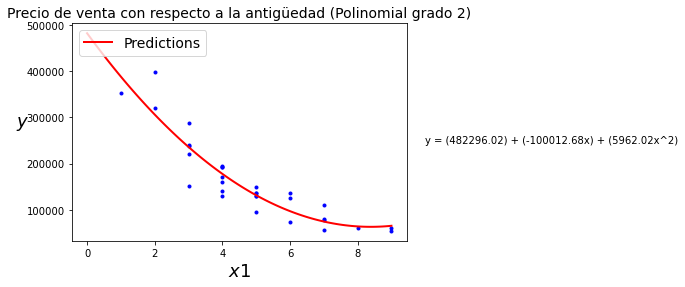

r^2 = 86.55469616300763%


In [25]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X1)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_poly, y1)

x_new = np.linspace(0, 9, 100).reshape(100, 1)
x_new_poly = poly.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(X1, y1, "b.")
plt.plot(x_new, y_new, "r-", linewidth = 2, label ="Predictions")

equation_polynomial = "y = (" + str(round(lin_reg.intercept_,2)) + ") + (" + str(round(lin_reg.coef_[1],2)) + "x) + (" + str(round(lin_reg.coef_[2],2)) + "x^2)"     
plt.text(10, 250000,equation_polynomial,verticalalignment='center')

plt.xlabel("$x1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Precio de venta con respecto a la antigüedad (Polinomial grado 2)",fontsize = 14)
                                                                                                                                                                                                                              
plt.show()

print(f"r^2 = {lin_reg.score(x_poly,y1)*100}%")

r^2 = 86.29200830580277%


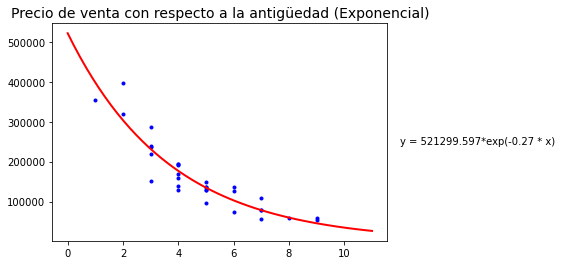

In [7]:
def f(x,c,k):
    return c*np.exp(k*x)

xdata = np.linspace(0, 11, 50) #Útil para graficar la línea
coeficientes, _ = curve_fit(f,X1.to_numpy()[:,0],y1.to_numpy())

plt.plot(X1, y1, "b.")
plt.plot(xdata, f(xdata,*coeficientes), "r-", linewidth = 2) #Gráficamos la línea usando los valores del linspace en la función
plt.title("Precio de venta con respecto a la antigüedad (Exponencial)",fontsize = 14)

equation_exponential ="y = " + str(round(coeficientes[0],3)) + "*exp(" + str(round(coeficientes[1],2)) + " * x)"

plt.text(12, 250000,equation_exponential,verticalalignment='center')

#Cálculo de r^2
residuals = y1 - f(X1.to_numpy()[:,0], *coeficientes)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y1-np.mean(y1))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"r^2 = {r_squared*100}%")

r^2 = 73.37514809323193%


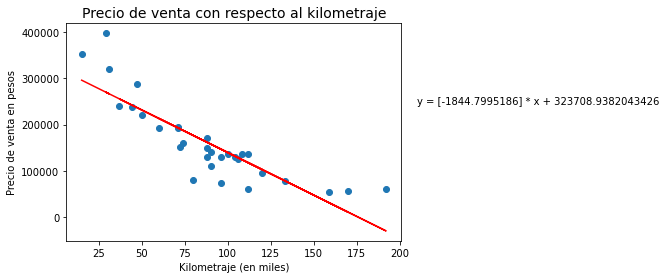

In [124]:
X2 = df[["Kilometraje (miles)"]]
y2 = df["Precio de Venta (pesos)"]

modelo2 = linear_model.LinearRegression().fit(X2,y2)

pred2 = modelo2.predict(X2)

plt.scatter(df["Kilometraje (miles)"],df["Precio de Venta (pesos)"],label = "Precio vs Kilometraje (miles)")
plt.plot(X2,pred2,color = 'red')
plt.title("Precio de venta con respecto al kilometraje",fontsize = 14)
plt.xlabel("Kilometraje (en miles)")
plt.ylabel("Precio de venta en pesos")

plt.text(210, 250000, 'y = ' + str(modelo2.coef_) + ' * x + ' + str(modelo2.intercept_) ,verticalalignment='center')

r2_score_2 = modelo2.score(X2,y2)
print(f"r^2 = {r2_score_2*100}%")

In [41]:
X_AK = df[["Kilometraje (miles)","Antigüedad (en años)"]]
y_AK = df["Precio de Venta (pesos)"]

modelAK = linear_model.LinearRegression()
modelAK.fit(X_AK,y_AK)

r2_score_AK = modelAK.score(X_AK,y_AK)
print("Regresión múltiple de Kilometraje y Antigüedad contra el Precio de Ventas\n")
print(f"y = {modelAK.intercept_} {modelAK.coef_[0]}*x_1 {modelAK.coef_[1]}*x_2")
print(f"r^2 = {r2_score_AK*100}%")

Regresión múltiple de Kilometraje y Antigüedad contra el Precio de Ventas

y = 350436.2729835997 -899.6807812509161*x_1 -22743.712582218905*x_2
r^2 = 81.12016839132411%


In [4]:
X = df.drop(columns = ["Precio de Venta (pesos)"])
y = df["Precio de Venta (pesos)"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [42]:
eq = "y = " + str(model.intercept_) + " "
for i in range(len(model.coef_)):
    eq = eq + "+ (" +str(model.coef_[i]) + "*x_" + str(i+1) + ") "

print("Regresión múltiple tomando todos los datos\n")
print(eq + "\n")
r2_score = model.score(X,y)
print(f"r^2 = {r2_score*100}%")

Regresión múltiple tomando todos los datos

y = 297260.419326813 + (-22663.83748268428*x_1) + (-414.3769803490535*x_2) + (14455.911773712713*x_3) + (65633.86731523699*x_4) + (-15522.520366926165*x_5) 

r^2 = 89.64284060297382%


In [6]:
pwd

'/Users/ArmandoTerrazasGomez/Documents/Universidad/Semestre 2/Análisis Estadístico/RetoEtapa1'